In [46]:
%matplotlib inline

import pandas as pd
from utils import get_mongo_db
import itertools

In [47]:
db = get_mongo_db()

Connecting to MongoDB at localhost:27017...


In [48]:
repos = db.repositories.find({ 'language': { '$ne': None } }, { 'language': True })
repos = list(repos)
len(repos)

64240

In [49]:
repos[0]

{'_id': 24002363, 'language': 'JavaScript'}

In [50]:
counts = {}
for repo in repos:
    if repo['language'] not in counts:
        counts[repo['language']] = 0
    counts[repo['language']] += 1

In [51]:
data = [{ 'language': lang, 'count': counts[lang] } for lang in counts]
df = pd.DataFrame(data)
df.sort_values(by='count', ascending=False)[0:10]

,count,language
115,14446,JavaScript
73,7763,Python
50,4991,PHP
29,4987,Ruby
19,3743,Java
84,3095,Objective-C
63,2802,C
161,2608,C++
157,2074,Go
15,1948,Shell


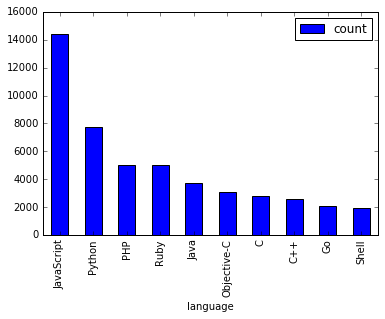

In [55]:
df.sort_values(by='count', ascending=False)[0:10].set_index('language').plot(kind='bar')

In [56]:
# Enjoy